### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### import forests with states

In [2]:
file_forests = 'cloud-data/digitalrnd-projects-ireland/Vaccine/Research/Magellan/users/XLO/test/wildfires/us_forests_ext_d100+state.csv.gz'
df_forests = pd.read_csv(file_forests, compression='gzip', sep=',', header=0, index_col=0)

df_forests

,PROCLAIMED,FORESTNAME,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry,STATE
0,105935010328,Kaibab National Forest,1601002.978,0.647156,9.140002,MULTIPOLYGON (((-112.3946842542064 36.11971353...,Arizona
1,106640010328,Fremont National Forest,1713917.383,0.760518,11.282002,MULTIPOLYGON (((-120.2196099831526 42.44059945...,"California,Oregon"
2,106887010328,Mt. Baker National Forest,1317676.621,0.648567,10.659633,MULTIPOLYGON (((-121.0182953055546 48.99885961...,Washington
3,107266010328,Olympic National Forest,695868.519,0.337426,8.179740,MULTIPOLYGON (((-123.9516082000847 47.34538681...,Washington
4,107474010328,Wallowa National Forest,1064857.162,0.496222,9.027734,MULTIPOLYGON (((-117.6943126670689 45.45236765...,"Oregon,Idaho,Washington"
...,...,...,...,...,...,...,...
149,295505010328,Trinity National Forest,1188515.052,0.512099,6.547120,MULTIPOLYGON (((-123.5598292190607 40.70215707...,California
150,66329010328,Bighorn National Forest,1112645.655,0.509899,4.943363,POLYGON ((-107.9456575113718 44.92725674857419...,"Wyoming,Montana"
151,93007010328,Gifford Pinchot National Forest,1532172.644,0.722290,11.679336,MULTIPOLYGON (((-122.3644060641187 46.28824773...,"Oregon,Washington"
152,96812010328,Manti-La Sal National Forest,1337654.214,0.561732,9.953308,MULTIPOLYGON (((-109.1958906989795 38.49227286...,"Colorado,Utah"


### import wildfires with forests

In [3]:
file_wildfires = 'cloud-data/digitalrnd-projects-ireland/Vaccine/Research/Magellan/users/XLO/test/wildfires/wildfires_data_forest.csv.gz'
df_wildfires = pd.read_csv(file_wildfires, compression='gzip', sep=',', header=0, index_col=0)

df_wildfires

,FOD_ID,FPA_ID,FIRE_YEAR,DISCO_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,geometry,PROCLAIMED,FORESTNAME,CAUSES_NAT_HUM
OBJECTID,,,,,,,,,,,,,
1,1,FS-1418826,2005,2005-02-02,9.0,Miscellaneous,40.036944,-121.005833,CA,POINT (-121.00583333 40.03694444),295390010328,Plumas National Forest,1
2,2,FS-1418827,2004,2004-05-12,1.0,Lightning,38.933056,-120.404444,CA,POINT (-120.40444444 38.93305556),295382010328,Eldorado National Forest,0
3,3,FS-1418835,2004,2004-05-31,5.0,Debris Burning,38.984167,-120.735556,CA,POINT (-120.73555556 38.98416667),295382010328,Eldorado National Forest,1
4,4,FS-1418845,2004,2004-06-28,1.0,Lightning,38.559167,-119.913333,CA,POINT (-119.91333333 38.55916667),295382010328,Eldorado National Forest,0
5,5,FS-1418847,2004,2004-06-28,1.0,Lightning,38.559167,-119.933056,CA,POINT (-119.93305556 38.55916667),295382010328,Eldorado National Forest,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880428,300348172,2013CAIRS22549226,2013,2013-04-20,8.0,Children,34.633333,-118.966666,CA,POINT (-118.966666 34.633333),295387010328,Los Padres National Forest,1
1880435,300348212,2015CAIRS28442302,2015,2015-08-06,1.0,Lightning,39.655817,-121.234567,CA,POINT (-121.234567 39.655817),295390010328,Plumas National Forest,0
1880450,300348289,2015CAIRS28493610,2015,2015-08-27,13.0,Missing/Undefined,34.666666,-119.333333,CA,POINT (-119.333333 34.666666),295387010328,Los Padres National Forest,1


### some viz

#### nb of wildfires per forest

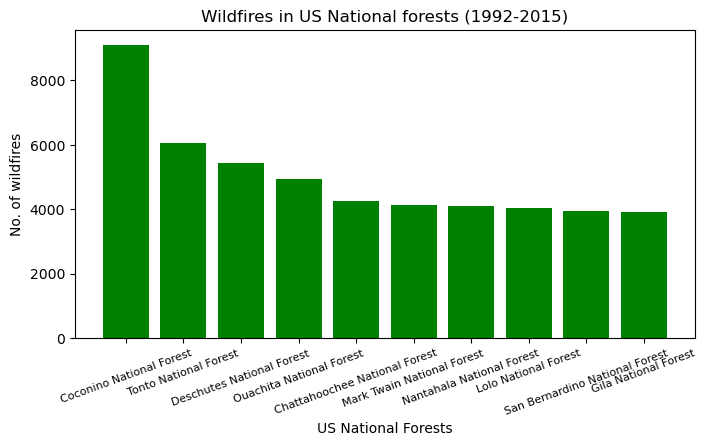

In [4]:
forests = df_wildfires['FORESTNAME'].value_counts().head(10).index
counts = df_wildfires['FORESTNAME'].value_counts().head(10).values

fig = plt.figure(figsize = (8, 4))
plt.bar(forests, counts, color='green')
 
plt.xlabel("US National Forests")
plt.xticks(rotation=20, size=8)
plt.ylabel("No. of wildfires")
plt.title("Wildfires in US National forests (1992-2015)")
plt.show()

In [5]:
out = df_wildfires.groupby('FORESTNAME')['CAUSES_NAT_HUM'].value_counts(normalize=True)
out.head(60)
#out.loc[out.index=='Coconino National Forest']

FORESTNAME                     CAUSES_NAT_HUM
Allegheny National Forest      1                 0.976285
                               0                 0.023715
Angeles National Forest        1                 0.904221
                               0                 0.095779
Angelina National Forest       1                 0.928392
                               0                 0.071608
Apache National Forest         0                 0.835758
                               1                 0.164242
Apalachicola National Forest   1                 0.583166
                               0                 0.416834
Arapaho National Forest        1                 0.685259
                               0                 0.314741
Ashley National Forest         0                 0.748418
                               1                 0.251582
Beaverhead National Forest     0                 0.628623
                               1                 0.371377
Bienville National Forest 

In [6]:
df_forests.loc[df_forests['FORESTNAME'].isin(forests)]
#.sort_values(by='FORESTNAME')

,PROCLAIMED,FORESTNAME,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry,STATE
16,295371010328,Ouachita National Forest,2724204.122,1.083554,15.427199,MULTIPOLYGON (((-94.95503097957199 34.80435372...,"Arkansas,Oklahoma"
18,295373010328,Coconino National Forest,2009446.799,0.802138,7.024632,"POLYGON ((-112.077960372975 34.86384343045252,...",Arizona
22,295377010328,Tonto National Forest,2966417.901,1.169763,7.912869,POLYGON ((-111.9855923858663 34.19602958881499...,Arizona
36,295391010328,San Bernardino National Forest,815569.325,0.322308,6.275971,MULTIPOLYGON (((-116.7285066830358 33.88641673...,California
41,295396010328,Chattahoochee National Forest,1470909.790,0.586065,10.440431,MULTIPOLYGON (((-84.7537428272983 34.757992244...,"Georgia,South Carolina,North Carolina,Tennessee"
58,295414010328,Mark Twain National Forest,3044946.433,1.251602,21.554919,MULTIPOLYGON (((-90.5347648900711 37.598868240...,"Arkansas,Missouri"
67,295423010328,Nantahala National Forest,1320763.161,0.529090,5.005493,"POLYGON ((-84.31429410866983 35.0191124139463,...","Georgia,South Carolina,North Carolina,Tennessee"
71,295427010328,Gila National Forest,2741548.223,1.073873,9.151112,MULTIPOLYGON (((-109.0477993332434 33.10684247...,"New Mexico,Arizona"
113,295469010328,Deschutes National Forest,1869820.814,0.846780,9.144263,MULTIPOLYGON (((-122.1466175656575 43.45107651...,Oregon
115,295471010328,Lolo National Forest,2638522.343,1.266557,29.123314,MULTIPOLYGON (((-114.0951860366181 47.01519409...,"Idaho,Montana"


In [7]:
model_forests = [295373010328, 295469010328, 295371010328, 295471010328]

In [8]:
#df_grouped = joined_gdf.groupby(by=['PROCLAIMED', 'DISCO_DATE'])['STATE'].apply(lambda x: ','.join(x)).reset_index()
df_grouped = df_wildfires.groupby(by=['PROCLAIMED', 'DISCO_DATE']) \
                                .agg({'FOD_ID':'count'}).rename(columns={'FOD_ID':'#wildfires'}).reset_index()
df_grouped

,PROCLAIMED,DISCO_DATE,#wildfires
0,66329010328,1992-06-10,1
1,66329010328,1992-06-11,1
2,66329010328,1992-07-03,1
3,66329010328,1992-07-04,3
4,66329010328,1992-07-09,1
...,...,...,...
137099,295505010328,2015-10-14,1
137100,295505010328,2015-10-26,1
137101,295505010328,2015-11-01,1
137102,295505010328,2015-11-03,1


In [9]:
df_grouped['#wildfires'].value_counts()

#wildfires
1     92586
2     23495
3      8896
4      4278
5      2370
6      1483
7       963
8       676
9       455
10      370
11      259
12      230
13      182
14      131
15      115
16       93
18       74
17       69
20       53
19       47
21       37
22       31
23       25
24       23
25       20
26       17
29       12
27       11
30       10
33        9
28        8
31        8
32        7
37        7
36        5
34        5
51        4
35        4
43        4
39        4
38        3
52        3
46        3
61        2
48        2
56        2
44        2
41        1
58        1
42        1
50        1
53        1
99        1
76        1
87        1
45        1
55        1
59        1
Name: count, dtype: int64